In [128]:
import pandas as pd
import numpy as np

last = pd.read_csv('data_last.csv')
mkt_cap = pd.read_csv('data_mkt_cap.csv')
sector = pd.read_csv('data_sector.csv')
vol = pd.read_csv('data_volume.csv')

# 1. compose a stock index using market cap weight, set it to 1000 point on 2020-01-06, and make a line plot

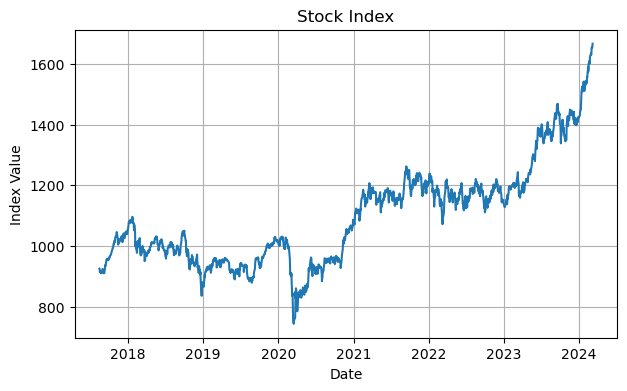

In [129]:
import matplotlib.pyplot as plt

ref_date = '2020-01-06'
ref_value = 1000

'''
    last_mkt_cap: combine last and mkt_cap for further processing

     date      | ticker       | date   | last      | mkt_cap      
    ----------------------------------------------------------------
    1332 JT    | 2017-08-16   | 562.12 | 199642.95 | 4.086578e+08 
        ...    |     ...      |   ...  |   ...     |     ...      

'''

last_mkt_cap = pd.merge(last, mkt_cap, on=["ticker", "date"])
last_mkt_cap['date'] = pd.to_datetime(last_mkt_cap['date'])

'''
    total_mkt_cap: compute total market cap of all stocks, to be used for calculating index

    date       | total_mkt_cap
    ---------------------------
    2017-08-16 | 4.086578e+08
        ...    |     ...
'''
    
total_mkt_cap = last_mkt_cap.groupby('date')['mkt_cap'].agg(sum).reset_index()
total_mkt_cap = total_mkt_cap.rename(columns={'mkt_cap': 'total_mkt_cap'})

def index_plot(ref_date, ref_value):
    '''
    index: normalised total market cap based on reference date and reference value

        date       | index
        -------------------------
        2017-08-16 | 925.293345
            ...    |     ...
    '''
    index = total_mkt_cap.copy()
    mkt_cap_at_ref_date = total_mkt_cap.loc[total_mkt_cap['date'] == ref_date, 'total_mkt_cap'].values[0]
    index['total_mkt_cap'] = (index['total_mkt_cap']/mkt_cap_at_ref_date)*ref_value
    index = index.rename(columns={'total_mkt_cap': 'index'})

    plt.figure(figsize=(7, 4))
    plt.plot(index['date'], index['index'])
    plt.title('Stock Index')
    plt.xlabel('Date')
    plt.ylabel('Index Value')
    plt.grid(True)
    plt.show()
    
index_plot(ref_date, ref_value)

# 2. find out the top 5 index move contributor  (both positive and negative) of each day in 2021-01

In [130]:
k = 5
yr = 2021
month = 1

def top_k_contributors(k, yr, month):
    contrib = last_mkt_cap.copy()
    # Calculate the rolling window difference of 'mkt_cap' for each stock, which is its contribution to index value
    contrib['mkt_cap_diff'] = contrib.groupby('ticker')['mkt_cap'].diff()

    # Filter out the first day for each stock (NaN values)
    contrib = contribution.dropna(subset=['mkt_cap_diff'])

    contrib_jan = contrib[(contrib['date'].dt.year == yr) & (contrib['date'].dt.month == month)]
    pos_contributors = contrib_jan.groupby('date')['ticker', 'mkt_cap_diff'].apply(lambda x: x.nlargest(5, 'mkt_cap_diff'))
    neg_contributors = contrib_jan.groupby('date')['ticker', 'mkt_cap_diff'].apply(lambda x: x.nsmallest(5, 'mkt_cap_diff'))
    print(f'Top {k} positive contributors:')
    print(pos_contributors['ticker'])
    print(f'\nTop {k} negative contributors:')
    print(neg_contributors['ticker'])
    
top_k_contributors(k, yr, month)

Top 5 positive contributors:
date              
2021-01-04  26406     2413 JT
            394176    9432 JT
            229479    6758 JT
            111153    4568 JT
            213489    6594 JT
                       ...   
2021-01-29  285462    7741 JT
            115968    4661 JT
            355818    8801 JT
            219903    6702 JT
            103176    4506 JT
Name: ticker, Length: 95, dtype: object

Top 5 negative contributors:
date              
2021-01-04  115950    4661 JT
            418161    9983 JT
            287043    7751 JT
            282246    7733 JT
            419760    9984 JT
                       ...   
2021-01-29  419778    9984 JT
            213507    6594 JT
            307848    8035 JT
            267873    7203 JT
            395793    9433 JT
Name: ticker, Length: 95, dtype: object


# 3. plot: for each sector, create a density plot of daily return of all the stocks in that sector in 2022

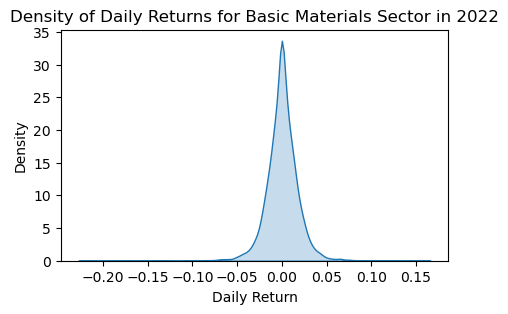

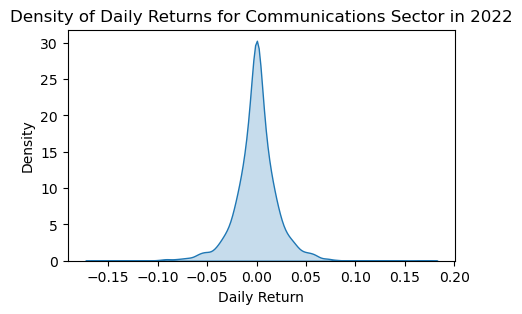

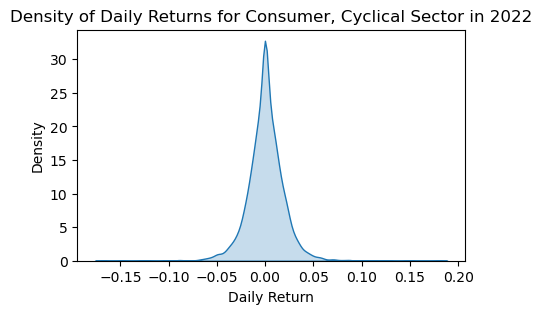

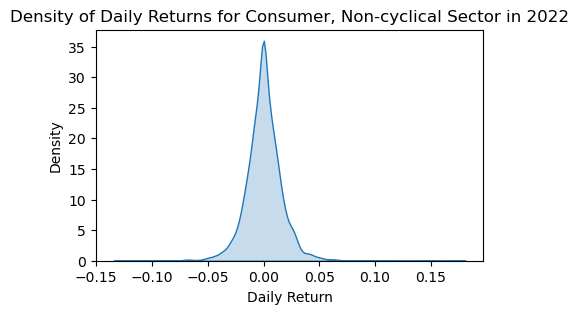

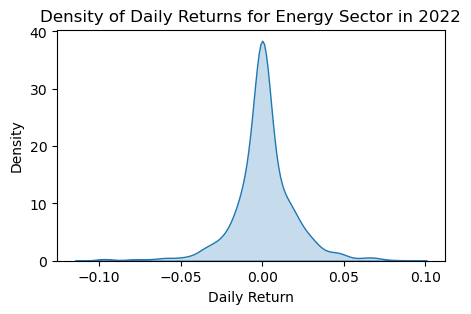

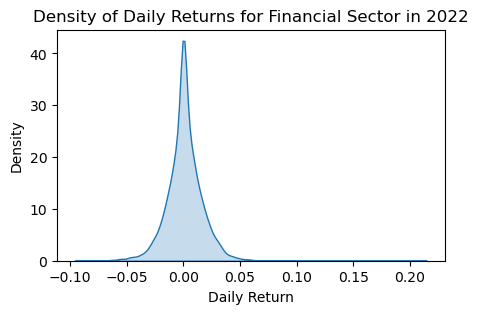

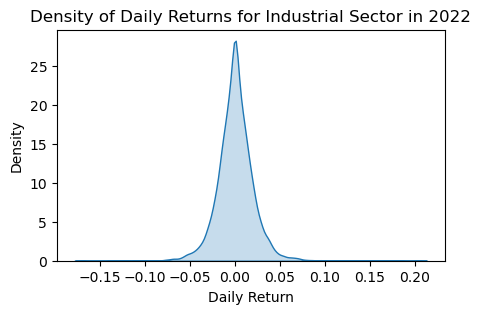

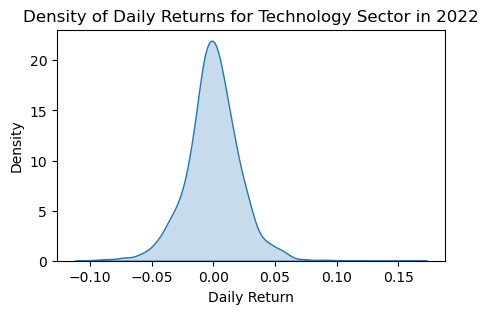

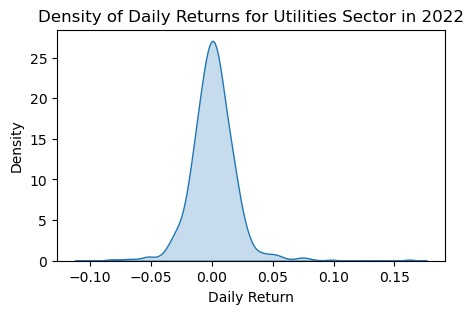

In [131]:
import seaborn as sns

plot_yr = 2022

def sectorwise_density_plot(plot_yr):
    sector_last = last.copy()
    sector_last['bics_sector'] = sector_last['ticker'].map(sector.set_index('ticker')['bics_sector'])
    sector_last['date'] = pd.to_datetime(sector_last['date'])

    plot_yr = 2022

    # calculate daily return, filter out price data that are not in the year of 2022
    sector_last['daily_return'] = sector_last.groupby('ticker')['last'].pct_change()
    sector_last_2022 = sector_last[sector_last['date'].dt.year == plot_yr]

    grouped_data = sector_last_2022.groupby('bics_sector')

    for sect, data in grouped_data:
        plt.figure(figsize=(5, 3))
        sns.kdeplot(data=data['daily_return'], shade=True)
        plt.title(f'Density of Daily Returns for {sect} Sector in 2022')
        plt.xlabel('Daily Return')
        plt.ylabel('Density')
        plt.show()
        
sectorwise_density_plot(plot_yr)